# Imports

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from evaluation.empirical_prediction import show_class_prediction, show_reg_prediction
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import os
from ete3 import Tree

In [3]:
models_path = "/workspace/phylo_estimation/data_inference/models/"
empirical_path = "/workspace/phylo_estimation/empirical/"
data_class_path = "/workspace/phylo_estimation/data_inference/pickles/old_sims/"
temperature_path = "/workspace/phylo_estimation/data_inference/temperatures/"

# Diversification scenario prediction

In [5]:
tr  = Tree("/workspace/phylo_estimation/empirical/coniferas_no_outgroup.nwk")

In [4]:
print("******EUCALYPTS******")
show_class_prediction(empirical_path + "Eucalypts_Mr_Bayes_dated_r8s_ultrametric_binary.nwk", models_path, data_class_path, temperature_path)

******EUCALYPTS******


  0%|          | 0/1 [00:00<?, ?it/s]


ValueError: Could not read the tree /workspace/phylo_estimation/empirical/Eucalypts_Mr_Bayes_dated_r8s_ultrametric_binary.nwk. Is it a valid newick?

Process ForkPoolWorker-44:
Process ForkPoolWorker-8:
Process ForkPoolWorker-23:
Process ForkPoolWorker-29:
Process ForkPoolWorker-47:
Process ForkPoolWorker-24:
Process ForkPoolWorker-22:
Process ForkPoolWorker-40:
Process ForkPoolWorker-45:


In [4]:
print("******CONIFERS******")
show_class_prediction(empirical_path + "coniferas_no_outgroup.nwk", models_path, data_class_path, temperature_path)

******CONIFERS******


100%|██████████| 1/1 [00:00<00:00, 24.24it/s]
/workspace/phylo_estimation/data_inference/dataset_code/utilities_vec.py:64: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  trees_vec_res = np.array(trees_vec_res)


1  trees loaded
489
----- No temperature model prediction -----
BD: 0.0000
HE: 0.0000
ME: 0.0013
SAT: 0.0000
SR: 0.9987
WW: 0.0000
----- Temperature model prediction -----
BD: 0.0000
HE: 0.0000
ME: 0.0044
SAT: 0.0000
SR: 0.9956
WW: 0.0000
----- Temperature model + MCMC Dropout prediction -----
BD: 0.0000
HE: 0.0049
ME: 0.0202
SAT: 0.0000
SR: 0.9748
WW: 0.0001
--- Classification Inference time: 6.491202354431152 seconds ---


In [4]:
print("******CETACEANS******")
show_class_prediction(empirical_path + "cetaceans.nwk", models_path, data_class_path, temperature_path)

******CETACEANS******


100%|██████████| 1/1 [00:00<00:00, 56.59it/s]
/workspace/phylo_estimation/data_inference/dataset_code/utilities_vec.py:64: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  trees_vec_res = np.array(trees_vec_res)


1  trees loaded
----- No temperature model prediction -----
BD: 0.3881
HE: 0.0074
ME: 0.0074
SAT: 0.0000
SR: 0.5971
WW: 0.0001
----- Temperature model prediction -----
BD: 0.3560
HE: 0.0109
ME: 0.0059
SAT: 0.0000
SR: 0.6269
WW: 0.0003
----- Temperature model + MCMC Dropout prediction -----
BD: 0.3816
HE: 0.0154
ME: 0.0103
SAT: 0.0001
SR: 0.5886
WW: 0.0040
--- Classification Inference time: 27.740556716918945 seconds ---


# Diversification rates prediction 

### Eucalypts 

In [8]:
data, preds, mean_pred, std_pred = show_reg_prediction("Eucalypts_Mr_Bayes_dated_r8s_ultrametric_binary.nwk", 'SR', models_path, 'norm_')
print(data)

******EUCALYPTS******


100%|██████████| 1/1 [00:00<00:00, 10.00it/s]
/workspace/phylo_estimation/data_inference/dataset_code/utilities_vec.py:64: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  trees_vec_res = np.array(trees_vec_res)


1  trees loaded
--- Regression Inference time for EUCALYPTS: 8.784042596817017 seconds ---
  Parameter  Predicted value
0        r0         0.264292
1        r1         0.015639
2        a0         0.236819
3        a1         0.725776
4      time         1.714207


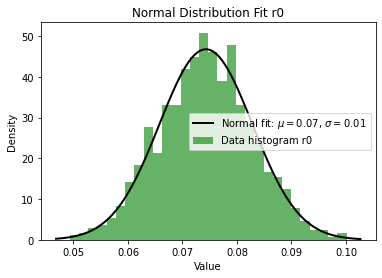

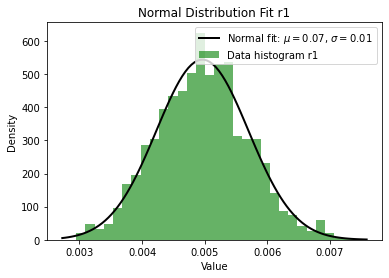

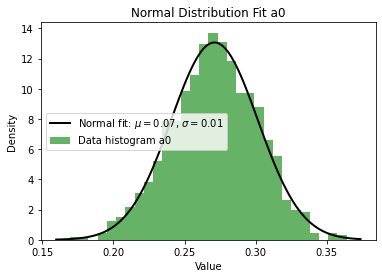

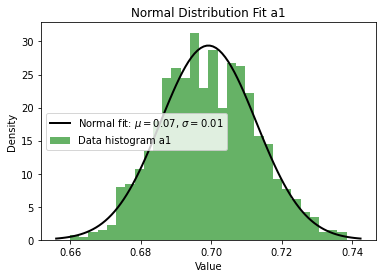

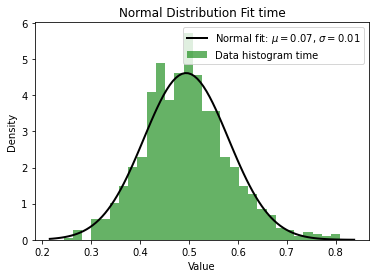

In [15]:
for i, param in enumerate(data["Parameter"]):
    
    # Plot the histogram of the data
    plt.hist(preds[:,:,i], bins=30, density=True, alpha=0.6, color='g', label='Data histogram' + " " + param)
    
    # Generate a range of values from min to max for plotting the PDF
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = stats.norm.pdf(x, mean_pred[0][i], std_pred[0][i])
    
    # Plot the normal distribution (PDF) using the computed mean and std dev
    plt.plot(x, pdf, 'k', linewidth=2, label=f'Normal fit: $\mu={mean_pred[0][0]:.2f}$, $\sigma={std_pred[0][0]:.2f}$')
    
    plt.title("Normal Distribution Fit" + " " + param)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    file_path = "/workspace/phylo_estimation/empirical/eucalypts/"
    os.makedirs(file_path, exist_ok=True)
    plt.savefig(file_path + param + "_" + "95_CI_empirical_inference_eucalypts.pdf")
    plt.show()

### Conifers

In [6]:
data, preds, mean_pred, std_pred = show_reg_prediction("coniferas_no_outgroup.nwk", 'SR', models_path, 'norm_')
print(data)

100%|██████████| 1/1 [00:00<00:00, 16.27it/s]
/workspace/phylo_estimation/data_inference/dataset_code/utilities_vec.py:64: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  trees_vec_res = np.array(trees_vec_res)


1  trees loaded
AAAAAAAAAAAAAAAAAAAAAA
(1, 489)
--- Regression Inference time 5.415442943572998 seconds ---
  Parameter  Predicted value
0        r0         0.073980
1        r1         0.004964
2        a0         0.269258
3        a1         0.699088
4      time         0.478806


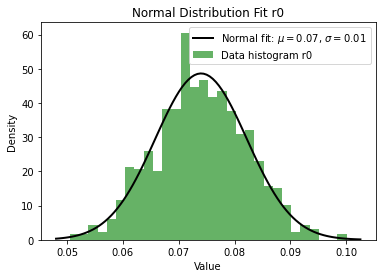

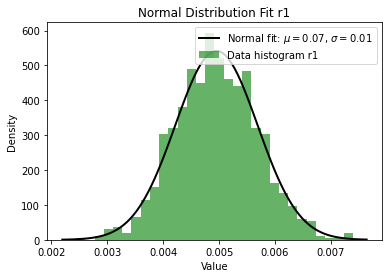

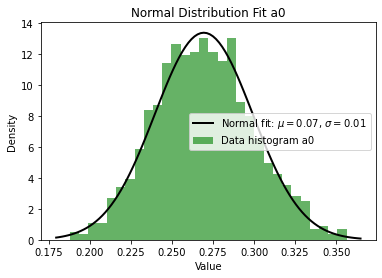

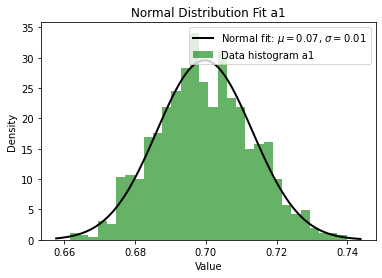

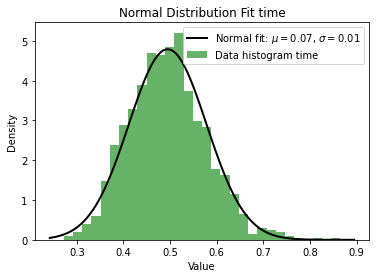

In [5]:
for i, param in enumerate(data["Parameter"]):
    
    # Plot the histogram of the data
    plt.hist(preds[:,:,i], bins=30, density=True, alpha=0.6, color='g', label='Data histogram' + " " + param)
    
    # Generate a range of values from min to max for plotting the PDF
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = stats.norm.pdf(x, mean_pred[0][i], std_pred[0][i])
    
    # Plot the normal distribution (PDF) using the computed mean and std dev
    plt.plot(x, pdf, 'k', linewidth=2, label=f'Normal fit: $\mu={mean_pred[0][0]:.2f}$, $\sigma={std_pred[0][0]:.2f}$')
    
    plt.title("Normal Distribution Fit" + " " + param)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    file_path = "/workspace/phylo_estimation/empirical/conifers/"
    os.makedirs(file_path, exist_ok=True)
    plt.savefig(file_path + param + "_" + "95_CI_empirical_inference_conifers.pdf")
    plt.show()

### Cetaceans

In [5]:
data, preds, mean_pred, std_pred = show_reg_prediction("cetaceans.nwk", 'SR', models_path, 'norm_')

100%|██████████| 1/1 [00:00<00:00, 39.60it/s]
/workspace/phylo_estimation/data_inference/dataset_code/utilities_vec.py:64: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  trees_vec_res = np.array(trees_vec_res)


1  trees loaded
(1, 87)
--- Regression Inference time 6.854938983917236 seconds ---


In [2]:
for i, param in enumerate(data["Parameter"]):
    
    # Plot the histogram of the data
    plt.hist(preds[:,:,i], bins=30, density=True, alpha=0.6, color='g', label='Data histogram' + " " + param)
    
    # Generate a range of values from min to max for plotting the PDF
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = stats.norm.pdf(x, mean_pred[0][i], std_pred[0][i])
    
    # Plot the normal distribution (PDF) using the computed mean and std dev
    plt.plot(x, pdf, 'k', linewidth=2, label=f'Normal fit: $\mu={mean_pred[0][0]:.2f}$, $\sigma={std_pred[0][0]:.2f}$')
    
    plt.title("Normal Distribution Fit" + " " + param)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    file_path = "/workspace/phylo_estimation/empirical/cetaceans/"
    os.makedirs(file_path, exist_ok=True)
    plt.savefig(file_path + param + "_" + "95_CI_empirical_inference_cetaceans.pdf")
    plt.show()

NameError: name 'data' is not defined